In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
from matplotlib import animation
plt.style.use('seaborn-pastel')

In [51]:
#==============
#=====DATI=====
#==============
k=0.2            #coupling const
n=4              #numero di oscillatori
time_int=1200
dt=0.003

In [52]:
data = np.genfromtxt('trajectory.csv', delimiter = ',')    #leggo i dati dal file trajectory.csv
oscill=np.array([np.array ([np.array ([0. ,1. ,0.])  for  osc in  range(n)]) for time in  range(time_int)])
for t in range(time_int):
    for osc in range(n):
        oscill[t][osc][0]=data[t][osc+1]  #theta
        oscill[t][osc][1]=math.cos(data[t][osc+1]) #cos theta
        oscill[t][osc][2]=math.sin(data[t][osc+1]) #sin theta
#l'array oscill avrà [theta,cos(theta),sin(theta)] per ogni oscillatore e per ogni istante (1200 righe e n colonne)    

In [55]:
data_order = np.genfromtxt('order.csv', delimiter= ',')        #leggo i dati dai file order.csv e Rorder.csv
data_r_order = np.genfromtxt('Rorder.csv', delimiter= ',')
order=np.array([np.array([0., 1., 0.]) for time in range(time_int)])
for x in range(time_int):
    order[x][0] = data_r_order[x][1]     #modulo
    order[x][1] = data_order[x][1]       #parte reale
    order[x][2] = data_order[x][2]       #parte immaginaria
#l'array order avrà [modulo di r,Re(r),Im(r)] per ogni istante (r parametro d'ordine)    

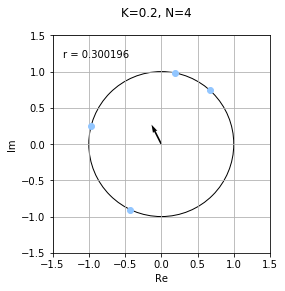

In [56]:
#=========
#=FIGURA==
#=========
fig = plt.figure()
ax = fig.add_subplot(autoscale_on=True, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
fig.suptitle('K='+str(k)+', N='+str(n))
ax.set_aspect('equal')
ax.grid()
ax.set_xlabel('Re')
ax.set_ylabel('Im')
cir=plt.Circle ((0 ,0) ,1,fill=False)  #unit circle su cui si muovono gli oscillatori
ax.add_artist(cir)
osc, =ax.plot([],[],'o')
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)  #invece del tempo ho messo il variare del modulo di r
#=========
#=FRECCIA=
#=========
Q=ax.quiver(0,0,0,0,units='xy',scale=1)  #freccia che ha come coordinate della punta Re(r) e Im(r)

#=========
#=INIT====
#=========
# initialization function 
def init():
    osc.set_data([], [])
    time_text.set_text('')
    return osc, time_text
#============
# = Animate =
#============
def animate(i):
    osc.set_data([oscill[i][osc][1] for osc in range(n)],[oscill[i][osc][2] for osc in range(n)])
    Q.set_UVC([order[i][1]],[order[i][2]])
    time_text.set_text('r = ' + str(order[i][0]))
    return osc, Q, time_text

anim=animation.FuncAnimation(fig, animate, frames=time_int, interval=8, blit=False)
        
plt.show()
anim.save('Kuramoto(k='+str(k)+',n='+str(n)+').mp4', fps=30)